# Clasificación 
Los registros ya preprocesados, procesados y con sus características extraídas serán clasificados. 
Como las señales EEG son no estacionarias, aunque se tengan muchos registros de un mismo usuario, al ser registros de distintos días no se pueden mezclar (por ahora teniendo en cuenta el estado del arte, aunque se están investigando formas de realizarlo). Por tanto, habrá que entrenar 3 clasificadores, uno por cada día de registros. 
Se tienen los siguientes días con el siguiente número de registros de características extraidas: 

    - W29-01_04_2021: 22 registros de características cada uno con 127x1 tareas, 127x32 datos, y 4x27x27 W
    - W29-29_03_2021: 22 registros de características cada uno con 127x1 tareas, 127x32 datos, y 4x27x27 W
    - W29-31_03_2021: 26 registros de características cada uno con 127x1 tareas, 127x32 datos, y 4x27x27 W
  
Además, por cada día hay dos tipos de trials: 

    - Registros impares: Registros en parado. La persona estaba quieta todo el rato mientras se registraban las señales, solo había imaginación motora. 
    - Registros pares: Registros en movimiento. 
Este tipo de registros también habra que clasificarlos por separado debido a las características de las señales EEG. 

Por tanto habrá que clasificar por un lado los registros pares y por otro los impares, clasificando por separado los registros de un día y de otro. Se tendrá un total de 6 modelos distintos entrenados. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os

In [3]:
class ROutputProcessed:
    def __init__(self, task_EEG_p, data_processed_EEG, W):
        self.task_EEG_p = task_EEG_p
        self.data_processed_EEG = data_processed_EEG
        self.W = W
        
class OutTaskData: 
    def __init__(self, task, data): 
        self.task = task
        self.data = data

In [4]:
import scipy.io as sio
# Primero leemos los registros
def read_output_features(rec):
    '''read_outputs("userS0091f1.mat")'''
    mat = sio.loadmat(rec)
    mdata = mat['session']
    val = mdata[0,0]
    output = ROutputProcessed(np.array(val["task_EEG_p"]), np.array(val["data_processed_EEG"]), np.array(val["W"]))
    return output

In [5]:
records = ["W29-29_03_2021", "W29-31_03_2021", "W29-01_04_2021"]
number_records_mat = [22, 26, 22]
record_contain_name = ["20210329", "20210331", "20210401"]


number_records_mat = [22, 26, 22]
rang = list(range(1,number_records_mat[0]))
if rang[0]<10:
    k = "0"+str(rang[0])
    rang[0]=k

output = read_output_features("./RegistrosProcesados2/"+records[0]+"/W29_"+record_contain_name[0]+"_openloop_"+str(rang[0]+"_processed.mat"))



In [6]:
print(np.shape(output.task_EEG_p), np.shape(output.data_processed_EEG), np.shape(output.W))

(127, 1) (127, 32, 1) (4, 27, 27)


In [7]:
output.task_EEG_p

array([[400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [400],
       [401],
       [401],
       [401],
       [401],
       [401],
       [401],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [402],
       [403],
       [403],
       [403],
       [403],
       [403],
       [403],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
       [404],
      

In [8]:
output.data_processed_EEG

array([[[-0.90162078],
        [-0.90571567],
        [-0.60805801],
        ...,
        [-0.90074081],
        [-1.27008767],
        [-0.82838072]],

       [[-0.87067936],
        [-0.83750233],
        [-0.85419444],
        ...,
        [-0.90409392],
        [-1.25076808],
        [-0.83999883]],

       [[-0.81917918],
        [-1.00584461],
        [-0.96510712],
        ...,
        [-0.92681836],
        [-1.35917558],
        [-0.94491996]],

       ...,

       [[-1.03163284],
        [-1.06530394],
        [-0.72530487],
        ...,
        [-0.96918838],
        [-0.77940056],
        [-1.05313272]],

       [[-1.33641159],
        [-0.91273866],
        [-0.80308026],
        ...,
        [-0.94813211],
        [-0.9465473 ],
        [-1.09954108]],

       [[-1.18710143],
        [-0.99413087],
        [-0.87655208],
        ...,
        [-0.95235637],
        [-0.8607482 ],
        [-1.15865736]]])

In [9]:
def draw_plot(output_task, output_data, electrodes_name):
    """Drow plot with mean"""
    output_task = np.array(output_task) 
    output_data = np.array(output_data)

    exit1 = np.mean((output_data[np.argwhere(output_task==402)[:,0],:]), axis=0) #r
    exit2 = np.mean((output_data[np.argwhere(output_task==404)[:,0],:]), axis=0) #b
    
    exit1.reshape(np.shape(exit1)[0],)
    exit2.reshape(np.shape(exit2)[0],)
    
    x = np.arange(0,32)

    plt.plot(x, exit1, 'r', label='402')
    plt.plot(x, exit2, 'b',label='404')
    plt.xlabel("Electrodes")
    plt.ylabel("Value")
    plt.title(electrodes_name)
    plt.legend(loc='best')
    plt.show()

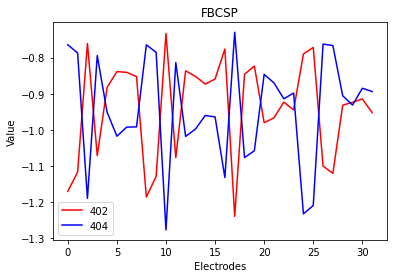

In [10]:
draw_plot(output.task_EEG_p, output.data_processed_EEG, "FBCSP")

### 1 - Clasificación KNN A mano

In [11]:
import numpy.matlib as npmt
from scipy import stats

def classifier_knn(X_test, X_train, y_train, k):
    #print((X_train))
    prediction = np.zeros((np.shape(X_test)[0],1))
    
    X_test = np.array(X_test)
    for i in range(0,np.shape(X_test)[0]):
        temp = X_test[i,:]
        temp2 = npmt.repmat(temp, np.shape(X_train)[0],1)
        temp3 = list(map(lambda x:x**2, temp2-X_train))
        temp4 = np.sqrt(np.sum(temp3, axis=1))[:,np.newaxis]
        temp5 = np.stack((temp4[:,0], np.array(y_train)[:,0]), axis = -1)
        
        temp6 = temp5[temp5[:,0].argsort()]
        prediction[i,0] = stats.mode(temp6[0:k,1])[0]
    return prediction

In [12]:
def kFoldCrossValidationKNN(principal_path, total_records, task1, task2, k, kKNN):
    """kFoldCrossValidationKNN('0091',122,123,5,4)"""
    lTaskData_even = [] # Pares
    lTaskData_odd = [] # Impares
    for i_rec in range(1,total_records+1):
        
        i_aux = i_rec
        if i_aux<10:
            i_aux = "0"+str(i_aux)
        record = principal_path+str(i_aux)+"_processed.mat"
        output = read_output_features(record)
        #print(record)
        #print(output.data_processed_EEG)
        output.data_processed_EEG = np.array(output.data_processed_EEG)
        output.data_processed_EEG = output.data_processed_EEG.reshape(np.shape(output.data_processed_EEG)[0],np.shape(output.data_processed_EEG)[1])
        #print(output.data_processed_EEG)
        # output.task será y, output.data será x
           
        outT = (output.task_EEG_p == task1) | (output.task_EEG_p == task2)
        outData = output.data_processed_EEG[outT[:,0],0:np.shape(output.data_processed_EEG)[1]]
        outTask = output.task_EEG_p[outT[:,0]]
        #print(np.shape(outData))
        #print(outData)
        
        outTD = OutTaskData(outTask, outData)
        if (i_rec % 2 ) == 0: # Pares 
            lTaskData_even.append(outTD)
        else: # Impares
            lTaskData_odd.append(outTD)
    #print(np.shape(lTaskData))
    
    # K-FOLD CROSS-VALIDATION
    success_even = np.zeros((1,k))[0] # k = 4 k-fold
    success_odd = np.zeros((1,k))[0] # k = 4 k-fold
    #print(success)
    
    # Pares
    window_even = int(len(lTaskData_even)/k)
    window_l_even = 0
    window_h_even = window_even # 5 registros en train por cada k
    # Impares
    window_odd = int(len(lTaskData_odd)/k)
    window_l_odd = 0
    window_h_odd = window_odd # 5 registros en train por cada k 
    
    for i in range(0,k):
        X_train_even, y_train_even, X_test_even, y_test_even = [],[],[],[] 
        X_train_odd, y_train_odd, X_test_odd, y_test_odd = [],[],[],[] 
        for j in range(0,int(total_records/2)):
            if j>= window_l_even and j<window_h_even: # It's the same with _odd
                X_test_even.extend(lTaskData_even[j].data)
                y_test_even.extend(lTaskData_even[j].task)
                X_test_odd.extend(lTaskData_odd[j].data)
                y_test_odd.extend(lTaskData_odd[j].task)
            else: 
                X_train_even.extend(lTaskData_even[j].data)
                y_train_even.extend(lTaskData_even[j].task)
                X_train_odd.extend(lTaskData_odd[j].data)
                y_train_odd.extend(lTaskData_odd[j].task)
        window_l_even += window_even
        window_h_even += window_even
        window_l_odd += window_odd
        window_h_odd += window_odd
        #print(np.shape(X_test), np.shape(X_train), np.shape(y_test), np.shape(y_train))
        
        # KNN
        KNN_classifier_even = classifier_knn(X_test_even, X_train_even, y_train_even, kKNN)
        KNN_classifier_odd = classifier_knn(X_test_odd, X_train_odd, y_train_odd, kKNN)
        
        success_even[i] = np.mean(KNN_classifier_even == y_test_even)*100
        success_odd[i] = np.mean(KNN_classifier_odd == y_test_odd)*100
    
    return round(np.mean(success_even),2), round(np.std(success_even),2), round(np.mean(success_odd),2), round(np.std(success_odd),2)


In [12]:
results_KNN_df = pd.DataFrame()
records = ["W29-29_03_2021", "W29-31_03_2021", "W29-01_04_2021"]
number_records_mat = [22, 26, 22]
record_contain_name = ["20210329", "20210331", "20210401"]

kKNN = [1,3,4,5,15]

results_KNN_df = pd.DataFrame()

for ki in kKNN:
    for i in range(len(records)):
        principal_path="./RegistrosProcesados2/"+records[i]+"/W29_"+record_contain_name[i]+"_openloop_"
        accuracy_even, std_even, accuracy_odd, std_odd = kFoldCrossValidationKNN(principal_path,number_records_mat[0], 402, 404, 4, ki) #principal_path, total_records, task1, task2, k)
        #print(records[i], ki, accuracy_even, std_even, accuracy_odd, std_odd)
        results_KNN_df = results_KNN_df.append({'Record': str(records[i]), 'K':str(ki),
                                                'Even results': "Acc: "+ str(accuracy_even) + " +- "+str(std_even),
                                                'Odd results': "Acc: "+ str(accuracy_odd) + " +- "+str(std_odd),
                                               }, ignore_index=True)
    
results_KNN_df

,Even results,K,Odd results,Record
0,Acc: 56.63 +- 1.14,1,Acc: 66.07 +- 14.07,W29-29_03_2021
1,Acc: 65.05 +- 14.86,1,Acc: 36.22 +- 10.71,W29-31_03_2021
2,Acc: 58.42 +- 8.01,1,Acc: 54.59 +- 18.79,W29-01_04_2021
3,Acc: 56.38 +- 7.37,3,Acc: 68.62 +- 14.42,W29-29_03_2021
4,Acc: 67.86 +- 14.88,3,Acc: 36.99 +- 13.02,W29-31_03_2021
5,Acc: 55.36 +- 8.61,3,Acc: 56.89 +- 21.18,W29-01_04_2021
6,Acc: 56.12 +- 7.87,4,Acc: 68.88 +- 12.92,W29-29_03_2021
7,Acc: 69.9 +- 14.83,4,Acc: 36.73 +- 11.34,W29-31_03_2021
8,Acc: 55.36 +- 9.14,4,Acc: 54.85 +- 18.33,W29-01_04_2021
9,Acc: 54.08 +- 10.68,5,Acc: 69.64 +- 13.33,W29-29_03_2021


### 2 - Otros clasificadores 

In [13]:
# Params: 
records = ["W29-29_03_2021", "W29-31_03_2021", "W29-01_04_2021"]
number_records_mat = [22, 26, 22]
record_contain_name = ["20210329", "20210331", "20210401"]

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [15]:
def read_records(principal_path, total_records, task1, task2):
    """ Used in train_model"""
    lTaskData_even = []
    lTaskData_odd = []
    for i_rec in range(1,total_records+1):
        i_aux = i_rec
        if i_aux<10:
            i_aux = "0"+str(i_aux)
        record = principal_path+str(i_aux)+"_processed.mat"
        output = read_output_features(record)
        #print(record)
        #print(output.data_processed_EEG)
        output.data_processed_EEG = np.array(output.data_processed_EEG)
        output.data_processed_EEG = output.data_processed_EEG.reshape(np.shape(output.data_processed_EEG)[0],np.shape(output.data_processed_EEG)[1])
        #print(output.data_processed_EEG)
        # output.task será y, output.data será x
           
        outT = (output.task_EEG_p == task1) | (output.task_EEG_p == task2)
        outData = output.data_processed_EEG[outT[:,0],0:np.shape(output.data_processed_EEG)[1]]
        outTask = output.task_EEG_p[outT[:,0]]
        #print(np.shape(outData))
        #print(outData)
        
        outTD = OutTaskData(outTask, outData)
        if (i_rec % 2 ) == 0: # Pares 
            lTaskData_even.append(outTD)
        else: 
            lTaskData_odd.append(outTD)
    return lTaskData_even, lTaskData_odd

In [21]:
def return_X_y_train_and_test(total_records, i, lTaskData):
    """ Used in train_model"""
    
    X_train, y_train, X_test, y_test = [],[],[],[] 
    for j in range(0,total_records):
        if j==i: 
            X_test.extend(lTaskData[j].data)
            y_test.extend(lTaskData[j].task)
        else: 
            X_train.extend(lTaskData[j].data)
            y_train.extend(lTaskData[j].task)
    X_train = np.array(X_train)
    y_train = np.ravel(np.array(y_train))
    X_test = np.array(X_test)
    y_test = np.ravel(np.array(y_test))
    
    print("HOLA",np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))
    return X_train, y_train, X_test, y_test
      

In [17]:
from sklearn.metrics import f1_score
import joblib

def obtain_model(model_clf_even, model_clf_odd, model_name, principal_path, record_name, total_records, kFold, task1, task2): 
    """obtain_model(model, model_name, path, 5 ,4,122,123)"""
    lTaskData_even, lTaskData_odd = read_records(principal_path, total_records, task1, task2) 
    
        
    # K-FOLD CROSS-VALIDATION
    success_even = np.zeros((1,kFold))[0]
    accuracies_even = np.zeros((1, kFold))[0]
    f1_scores_even = np.zeros((1, kFold))[0]
    best_f1_score_even = 0
    
    success_odd = np.zeros((1,kFold))[0]
    accuracies_odd = np.zeros((1, kFold))[0]
    f1_scores_odd = np.zeros((1, kFold))[0]
    best_f1_score_odd = 0
    
    for i in range(0,kFold):
        X_train_even, y_train_even, X_test_even, y_test_even = return_X_y_train_and_test(int(total_records/2), i, lTaskData_even)
        X_train_odd, y_train_odd, X_test_odd, y_test_odd = return_X_y_train_and_test(int(total_records/2), i, lTaskData_odd)
        #print(i)
        
        # Train model
        
        #print(np.shape(X_train_even), np.shape(X_test_even), np.shape(y_train_even), np.shape(y_test_even))
        #print(np.shape(X_train_odd), np.shape(X_test_odd), np.shape(y_train_odd), np.shape(y_test_odd))
        
        model_clf_even.fit(X_train_even, y_train_even)
        model_clf_odd.fit(X_train_odd, y_train_odd)
        y_pred_even = model_clf_even.predict(X_test_even)
        y_pred_odd = model_clf_odd.predict(X_test_odd)
        success_even[i] = np.mean(y_pred_even == y_test_even)*100 # A mano
        success_odd[i] = np.mean(y_pred_odd == y_test_odd)*100
        accuracies_even[i] = model_clf_even.score(X_test_even, y_test_even) # Método sklearn -> return the mean accuracy
        # Como a veces la métrica accuracy (que es la que hemos usado en success y accuracies) es engañosa cuando las clases
        # están desbalanceadas, vamos a usar la métrica F1. 
        # La métrica F1 es una métrica que combina precision (nos da la calidad de la predicción, que % de lo 
        # que hemos predicho que es positivo en realidad lo es) y recall (nos da la cantidad, que % de la clase positiva
        # hemos sido capaces de identificar), para ello realiza la media armónica (harmonic mean) que da mucho más peso a 
        # valores bajos 
        accuracies_odd[i] = model_clf_odd.score(X_test_odd, y_test_odd)
        f1_scores_even[i] = f1_score(y_test_even, y_pred_even, average="macro")
        f1_scores_odd[i] = f1_score(y_test_odd, y_pred_odd, average="macro")
        # Guardo el mejor modelo
        if f1_scores_even[i]> best_f1_score_even:
            joblib.dump(model_clf_even, './Modelos/'+model_name+'_even_clf_'+str(record_name)+'_'+str(task1)+'_'+str(task2)+'.pkl') 
            # Para cargar el modelo: knn_clf = joblib.load('knn_clf.pkl') # Carga del modelo.
            best_f1_score_even = f1_scores_even[i]
        if f1_scores_odd[i]> best_f1_score_odd:
            joblib.dump(model_clf_odd, './Modelos/'+model_name+'_odd_clf_'+str(record_name)+'_'+str(task1)+'_'+str(task2)+'.pkl') 
            # Para cargar el modelo: knn_clf = joblib.load('knn_clf.pkl') # Carga del modelo.
            best_f1_score_odd = f1_scores_odd[i]
    
    return round(np.mean(success_even),2), round(np.std(success_even),2), round(np.mean(f1_scores_even)*100, 2), round(np.mean(success_odd),2), round(np.std(success_odd),2), round(np.mean(f1_scores_odd)*100, 2)

In [18]:
def show_results(model_clf_even, model_clf_odd, model_name, principal_path, record_name, total_records, kFold, task1, task2):
    results_df = pd.DataFrame()
    
    accuracy_even, std_even, f1_score_mean_even, accuracy_odd, std_odd, f1_score_mean_odd = obtain_model(model_clf_even, model_clf_odd, model_name, principal_path, record_name, total_records, kFold, task1, task2) ## LLAMADA AL CLASIFICADOR
        
    results_df = results_df.append({'Model':model_name, 'Record': str(record_name), 
                                    'Even results': "Acc: "+ str(accuracy_even) + " +- "+str(std_even) +" || F1: "+str(f1_score_mean_even),
                                    'Odd results': "Acc: "+ str(accuracy_odd) + " +- "+str(std_odd) +" || F1: "+str(f1_score_mean_odd)
                                   }, ignore_index=True)

    return results_df

In [19]:
records = ["W29-29_03_2021", "W29-31_03_2021", "W29-01_04_2021"]
number_records_mat = [22, 26, 22]
record_contain_name = ["20210329", "20210331", "20210401"]

In [22]:
all_results_df = pd.DataFrame()

principal_path = "./RegistrosProcesados2/"+records[0]+"/W29_"+record_contain_name[0]+"_openloop_"
print("SGDClassifier : Linear SVM")
sgd_linear_clf_even = make_pipeline(MinMaxScaler(), SGDClassifier(random_state=42)) # SGDClassifier loss default "hinge" which gives a linear SVM
sgd_linear_clf_odd = make_pipeline(MinMaxScaler(), SGDClassifier(random_state=42)) # SGDClassifier loss default "hinge" which gives a linear SVM

all_results_df = pd.concat([all_results_df, show_results(sgd_linear_clf_even, sgd_linear_clf_odd, "sgd_linear", principal_path, records[0], number_records_mat[0], int(number_records_mat[0]/2), 402,404)])
all_results_df

SGDClassifier : Linear SVM
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)
HOLA (490, 32) (490,) (49, 32) (49,)


,Even results,Model,Odd results,Record
0,Acc: 59.93 +- 25.42 || F1: 58.34,sgd_linear,Acc: 70.69 +- 29.42 || F1: 69.19,W29-29_03_2021


### Grid Search

In [21]:
records = ["W29-29_03_2021", "W29-31_03_2021", "W29-01_04_2021"]
number_records_mat = [22, 26, 22]
record_contain_name = ["20210329", "20210331", "20210401"]

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [23]:
def run_grid_search(param_grid, model_grid_even, model_grid_odd, task1, task2, records, record_contain_name, total_records, kFold):
    aux = 0
    for r in records:
        for i in range(0,total_records[aux]):
            principal_path = "./RegistrosProcesados2/"+r+"/W29_"+record_contain_name[aux]+"_openloop_"
            lTaskData_even, lTaskData_odd = read_records(principal_path, total_records[aux], task1, task2) 
            X_train_even, y_train_even, X_test_even, y_test_even = return_X_y_train_and_test(int(total_records[aux]/2), i, lTaskData_even)
            X_train_odd, y_train_odd, X_test_odd, y_test_odd = return_X_y_train_and_test(int(total_records[aux]/2), i, lTaskData_odd)
            grid_search_even = GridSearchCV (model_grid_even, param_grid, cv = kFold, scoring = 'accuracy', return_train_score = True)
            grid_search_even.fit(X_train_even, y_train_even)
            grid_search_odd = GridSearchCV (model_grid_odd, param_grid, cv = kFold, scoring = 'accuracy', return_train_score = True)
            grid_search_odd.fit(X_train_odd, y_train_odd)
            print(str(r), str(task1), str(task2), str(i), 'EVEN:', grid_search_even.best_estimator_, round(grid_search_even.best_score_,2), 'ODD:', grid_search_odd.best_estimator_, round(grid_search_odd.best_score_,2))
        aux +=1

In [24]:
# KNN
run_grid_search([{'n_neighbors':[3, 5, 15,30]}], KNeighborsClassifier(), KNeighborsClassifier(), 402, 404, records, record_contain_name, number_records_mat, 4)

W29-29_03_2021 402 404 0 EVEN: KNeighborsClassifier(n_neighbors=30) 0.68 ODD: KNeighborsClassifier(n_neighbors=15) 0.85
W29-29_03_2021 402 404 1 EVEN: KNeighborsClassifier() 0.62 ODD: KNeighborsClassifier(n_neighbors=15) 0.86
W29-29_03_2021 402 404 2 EVEN: KNeighborsClassifier(n_neighbors=15) 0.68 ODD: KNeighborsClassifier(n_neighbors=15) 0.86
W29-29_03_2021 402 404 3 EVEN: KNeighborsClassifier(n_neighbors=30) 0.68 ODD: KNeighborsClassifier(n_neighbors=30) 0.88
W29-29_03_2021 402 404 4 EVEN: KNeighborsClassifier(n_neighbors=3) 0.62 ODD: KNeighborsClassifier(n_neighbors=30) 0.77
W29-29_03_2021 402 404 5 EVEN: KNeighborsClassifier(n_neighbors=15) 0.64 ODD: KNeighborsClassifier(n_neighbors=30) 0.82
W29-29_03_2021 402 404 6 EVEN: KNeighborsClassifier(n_neighbors=3) 0.63 ODD: KNeighborsClassifier(n_neighbors=30) 0.81
W29-29_03_2021 402 404 7 EVEN: KNeighborsClassifier(n_neighbors=15) 0.62 ODD: KNeighborsClassifier(n_neighbors=30) 0.82
W29-29_03_2021 402 404 8 EVEN: KNeighborsClassifier(n_ne

In [25]:
# TREE
run_grid_search([{'max_depth':[3, 5, 10, 15]}], tree.DecisionTreeClassifier(), tree.DecisionTreeClassifier(), 402, 404, records, record_contain_name, number_records_mat, 4)

W29-29_03_2021 402 404 0 EVEN: DecisionTreeClassifier(max_depth=5) 0.65 ODD: DecisionTreeClassifier(max_depth=10) 0.77
W29-29_03_2021 402 404 1 EVEN: DecisionTreeClassifier(max_depth=3) 0.58 ODD: DecisionTreeClassifier(max_depth=5) 0.83
W29-29_03_2021 402 404 2 EVEN: DecisionTreeClassifier(max_depth=5) 0.62 ODD: DecisionTreeClassifier(max_depth=5) 0.74
W29-29_03_2021 402 404 3 EVEN: DecisionTreeClassifier(max_depth=5) 0.63 ODD: DecisionTreeClassifier(max_depth=5) 0.79
W29-29_03_2021 402 404 4 EVEN: DecisionTreeClassifier(max_depth=3) 0.62 ODD: DecisionTreeClassifier(max_depth=15) 0.75
W29-29_03_2021 402 404 5 EVEN: DecisionTreeClassifier(max_depth=3) 0.66 ODD: DecisionTreeClassifier(max_depth=3) 0.78
W29-29_03_2021 402 404 6 EVEN: DecisionTreeClassifier(max_depth=3) 0.5 ODD: DecisionTreeClassifier(max_depth=3) 0.72
W29-29_03_2021 402 404 7 EVEN: DecisionTreeClassifier(max_depth=5) 0.67 ODD: DecisionTreeClassifier(max_depth=5) 0.77
W29-29_03_2021 402 404 8 EVEN: DecisionTreeClassifier(m

In [26]:
# RandomForest
run_grid_search([{'n_estimators':[ 10, 100, 500], 'max_depth': [5, 10, 100], 'random_state': [42]}], RandomForestClassifier(), RandomForestClassifier(), 402, 404, records, record_contain_name, number_records_mat, 4)

W29-29_03_2021 402 404 0 EVEN: RandomForestClassifier(max_depth=5, random_state=42) 0.68 ODD: RandomForestClassifier(max_depth=10, random_state=42) 0.77
W29-29_03_2021 402 404 1 EVEN: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42) 0.59 ODD: RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42) 0.84
W29-29_03_2021 402 404 2 EVEN: RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42) 0.69 ODD: RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42) 0.82
W29-29_03_2021 402 404 3 EVEN: RandomForestClassifier(max_depth=10, random_state=42) 0.72 ODD: RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42) 0.88
W29-29_03_2021 402 404 4 EVEN: RandomForestClassifier(max_depth=100, random_state=42) 0.61 ODD: RandomForestClassifier(max_depth=5, random_state=42) 0.77
W29-29_03_2021 402 404 5 EVEN: RandomForestClassifier(max_depth=10, random_state=42) 0.68 ODD: RandomForestClassifier(max_depth=5, n_estimators

W29-01_04_2021 402 404 2 EVEN: RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42) 0.61 ODD: RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42) 0.71
W29-01_04_2021 402 404 3 EVEN: RandomForestClassifier(max_depth=100, random_state=42) 0.67 ODD: RandomForestClassifier(max_depth=10, random_state=42) 0.7
W29-01_04_2021 402 404 4 EVEN: RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42) 0.61 ODD: RandomForestClassifier(max_depth=5, random_state=42) 0.55
W29-01_04_2021 402 404 5 EVEN: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42) 0.64 ODD: RandomForestClassifier(max_depth=10, random_state=42) 0.59
W29-01_04_2021 402 404 6 EVEN: RandomForestClassifier(max_depth=10, random_state=42) 0.61 ODD: RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42) 0.58
W29-01_04_2021 402 404 7 EVEN: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42) 0.66 ODD: RandomForestClassifier(max_dept

In [27]:
# ExtraTreesClassifier
run_grid_search([{'n_estimators':[ 10, 100, 500], 'max_depth': [5, 10, 100], 'random_state': [42]}], ExtraTreesClassifier(), ExtraTreesClassifier(), 402, 404, records, record_contain_name, number_records_mat, 4)

W29-29_03_2021 402 404 0 EVEN: ExtraTreesClassifier(max_depth=10, random_state=42) 0.69 ODD: ExtraTreesClassifier(max_depth=5, random_state=42) 0.81
W29-29_03_2021 402 404 1 EVEN: ExtraTreesClassifier(max_depth=5, n_estimators=10, random_state=42) 0.62 ODD: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.83
W29-29_03_2021 402 404 2 EVEN: ExtraTreesClassifier(max_depth=5, random_state=42) 0.7 ODD: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.83
W29-29_03_2021 402 404 3 EVEN: ExtraTreesClassifier(max_depth=5, n_estimators=500, random_state=42) 0.75 ODD: ExtraTreesClassifier(max_depth=5, n_estimators=500, random_state=42) 0.89
W29-29_03_2021 402 404 4 EVEN: ExtraTreesClassifier(max_depth=5, random_state=42) 0.64 ODD: ExtraTreesClassifier(max_depth=5, n_estimators=10, random_state=42) 0.79
W29-29_03_2021 402 404 5 EVEN: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.67 ODD: ExtraTreesClassifier(max_depth=100, n_

W29-31_03_2021 402 404 25 EVEN: ExtraTreesClassifier(max_depth=5, n_estimators=10, random_state=42) 0.65 ODD: ExtraTreesClassifier(max_depth=10, n_estimators=10, random_state=42) 0.47
W29-01_04_2021 402 404 0 EVEN: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.66 ODD: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.56
W29-01_04_2021 402 404 1 EVEN: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.65 ODD: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.56
W29-01_04_2021 402 404 2 EVEN: ExtraTreesClassifier(max_depth=100, random_state=42) 0.6 ODD: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.75
W29-01_04_2021 402 404 3 EVEN: ExtraTreesClassifier(max_depth=100, n_estimators=500, random_state=42) 0.66 ODD: ExtraTreesClassifier(max_depth=10, random_state=42) 0.72
W29-01_04_2021 402 404 4 EVEN: ExtraTreesClassifier(max_depth=10, random_state=42) 0.57 ODD: ExtraTree

### Build Models

In [28]:
records = ["W29-29_03_2021", "W29-31_03_2021", "W29-01_04_2021"]
number_records_mat = [22, 26, 22]
record_contain_name = ["20210329", "20210331", "20210401"]

In [29]:
all_results_df = pd.DataFrame()

aux = 0
for r in records: 
    print("Doing record ", str(r))
    
    principal_path = "./RegistrosProcesados2/"+r+"/W29_"+record_contain_name[aux]+"_openloop_"
    
    # 1 - KNN 
    print("KNN")
    n_neighbors_e = [30, 15, 15] # GridSearch
    n_neighbors_o = [15, 3, 3] # GridSearch
    knn_clf_even = KNeighborsClassifier(n_neighbors =  n_neighbors_e[aux])
    knn_clf_odd = KNeighborsClassifier(n_neighbors = n_neighbors_o[aux])
    all_results_df = pd.concat([all_results_df, show_results(knn_clf_even, knn_clf_odd, "knn_"+str(15), principal_path, r, int(number_records_mat[aux]), 4, 402,404)])
    
    # 2 - SGD
    # SGDClassifier : Linear SVM
    print("SGDClassifier : Linear SVM")
    sgd_linear_clf_even = make_pipeline(MinMaxScaler(), SGDClassifier(random_state=42)) # SGDClassifier loss default "hinge" which gives a linear SVM
    sgd_linear_clf_odd = make_pipeline(MinMaxScaler(), SGDClassifier(random_state=42)) # SGDClassifier loss default "hinge" which gives a linear SVM
    all_results_df = pd.concat([all_results_df, show_results(sgd_linear_clf_even, sgd_linear_clf_odd, "sgd_linear", principal_path, r, int(number_records_mat[aux]), 4, 402,404)])
    # SGDClassifier : Logistic Regression
    print("SGDClassifier : Logistic Regression")
    sgd_logistic_clf_even = make_pipeline(MinMaxScaler(), SGDClassifier(loss = "log", random_state=42)) # SGDClassifier loss default "hinge" which gives a linear SVM
    sgd_logistic_clf_odd = make_pipeline(MinMaxScaler(), SGDClassifier(loss = "log", random_state=42)) # SGDClassifier loss default "hinge" which gives a linear SVM
    all_results_df = pd.concat([all_results_df, show_results(sgd_logistic_clf_even, sgd_logistic_clf_odd, "sgd_logistic", principal_path, r, int(number_records_mat[aux]), 4, 402,404)])
    
    # 3 - SVM
    # LinearSVM 
    print("LinearSVM ")
    max_iter = [50000, 50000, 50000]
    svm_linear_clf_even = make_pipeline(MinMaxScaler(), LinearSVC(C = 1, loss = "hinge", dual = True,  max_iter = max_iter[aux], random_state = 42))   
    svm_linear_clf_odd = make_pipeline(MinMaxScaler(), LinearSVC(C = 1, loss = "hinge", dual = True,  max_iter = max_iter[aux], random_state = 42))   
    all_results_df = pd.concat([all_results_df, show_results (svm_linear_clf_even, svm_linear_clf_odd, "svm_linear", principal_path, r, int(number_records_mat[aux]), 4, 402,404)])    

    
    # Gaussian RBF Kernel
    print("SVM - Gaussian RBF Kernel ")
    svm_rbf_clf_even = make_pipeline(MinMaxScaler(), SVC(kernel = "rbf", gamma = 0.1, C = 10, random_state = 42)) 
    svm_rbf_clf_odd = make_pipeline(MinMaxScaler(), SVC(kernel = "rbf", gamma = 0.1, C = 10, random_state = 42)) 
    all_results_df = pd.concat([all_results_df, show_results (svm_rbf_clf_even, svm_rbf_clf_odd, "svm_rbf", principal_path, r, int(number_records_mat[aux]), 4, 402,404)])    
   
    
    # 4 - Tree
    # DecisionTreeClassifier
    print("Tree")
    max_depth_e = [3, 3, 3] # GridSearch
    max_depth_o = [3, 3, 10] # GridSearch
    tree_clf_even = tree.DecisionTreeClassifier(max_depth = max_depth_e[aux], random_state = 42)
    tree_clf_odd = tree.DecisionTreeClassifier(max_depth = max_depth_o[aux], random_state = 42)
    all_results_df = pd.concat([all_results_df, show_results(tree_clf_even, tree_clf_odd, "tree", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
     
    
    # 5 - Random Trees
    # RandomForestClassifier
    print("RandomForestClassifier")
    n_estimators_rfc_e = [100, 100, 100]
    max_depth_rfc_e = [10, 100, 10]
    n_estimators_rfc_o = [500, 100, 100]
    max_depth_rfc_o = [5, 5, 100]
    rfc_clf_even = RandomForestClassifier(n_estimators = n_estimators_rfc_e[aux], max_depth = max_depth_rfc_e[aux], random_state = 42) # 500 y 10
    rfc_clf_odd = RandomForestClassifier(n_estimators = n_estimators_rfc_o[aux] max_depth = max_depth_rfc_o[aux], random_state = 42) # 500 y 10
    all_results_df = pd.concat([all_results_df, show_results(rfc_clf_even, rfc_clf_odd, "rfc", principal_path, r, int(number_records_mat[aux]), 4, 402,404)])  
    # ExtraTreesClassifier
    print("ExtraTreesClassifier")
    n_estimators_extra_e = [100, 10, 100]
    max_depth_extra_e = [5, 5, 100]
    n_estimators_extra_o = [500, 100, 500]
    max_depth_extra_o = [5, 10, 10]
    extra_trees_clf_even = ExtraTreesClassifier(n_estimators = n_estimators_extra_e[aux], max_depth = max_depth_extra_e[aux], random_state = 42) # 500 y 100
    extra_trees_clf_odd = ExtraTreesClassifier(n_estimators = n_estimators_extra_o[aux], max_depth = max_depth_extra_o[aux], random_state = 42) # 500 y 100
    all_results_df = pd.concat([all_results_df, show_results(extra_trees_clf_even, extra_trees_clf_odd, "extra_trees", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
    
    # 6 - Naive Bayes
    # GaussianNB
    print("GaussianNB")
    gnb_clf_even = GaussianNB()
    gnb_clf_odd = GaussianNB()
    all_results_df = pd.concat([all_results_df, show_results(gnb_clf_even, gnb_clf_odd, "gnb", principal_path, r, int(number_records_mat[aux]), 4, 402,404)])      
    # MultinomialNB
    print("MultinomialNB")
    mnb_clf_even = make_pipeline(MinMaxScaler(), MultinomialNB()) 
    mnb_clf_odd = make_pipeline(MinMaxScaler(), MultinomialNB()) 
    all_results_df = pd.concat([all_results_df, show_results(mnb_clf_even, mnb_clf_odd, "mnb", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
    # BernoulliNB
    print("BernoulliNB")
    bnb_clf_even = BernoulliNB()
    bnb_clf_odd = BernoulliNB()
    all_results_df = pd.concat([all_results_df, show_results(bnb_clf_even, bnb_clf_odd, "bnb", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
    
    # 7 - Softmax
    # LogisticRegression
    print("Softmax")
    softmax_clf_even = make_pipeline(MinMaxScaler(), LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10, max_iter = 300, random_state = 42))
    softmax_clf_odd = make_pipeline(MinMaxScaler(), LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10, max_iter = 300, random_state = 42))
    all_results_df = pd.concat([all_results_df, show_results(softmax_clf_even, softmax_clf_odd, "softmax", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
        # Ha ocurrido que no converge lbfgs failed to converge (status=1):
            # Aquí explican el porqué https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
            # Vamos a probar aumentando las iters
    
    # 8 - Discriminant Analysis
    # LinearDiscriminantAnalysis
    print("LinearDiscriminantAnalysis")
    linearda_clf_even = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis()) 
    linearda_clf_odd = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis()) 
    all_results_df = pd.concat([all_results_df, show_results(linearda_clf_even, linearda_clf_odd, "linearda", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
    # QuadraticDiscriminantAnalysis
    print("QuadraticDiscriminantAnalysis")
    quadraticda_clf_even = make_pipeline(MinMaxScaler(), QuadraticDiscriminantAnalysis())
    quadraticda_clf_odd = make_pipeline(MinMaxScaler(), QuadraticDiscriminantAnalysis())
    all_results_df = pd.concat([all_results_df, show_results(quadraticda_clf_even, quadraticda_clf_odd, "quadraticda", principal_path, r, int(number_records_mat[aux]), 4, 402,404)]) 
    
    print("Done record ", str(r))
    print()
     
    aux += 1
all_results_df

Doing record  W29-29_03_2021
KNN
SGDClassifier : Linear SVM
SGDClassifier : Logistic Regression
LinearSVM 
SVM - Gaussian RBF Kernel 
Tree
RandomForestClassifier
ExtraTreesClassifier
GaussianNB
MultinomialNB
BernoulliNB
Softmax
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
Done record  W29-29_03_2021

Doing record  W29-31_03_2021
KNN
SGDClassifier : Linear SVM
SGDClassifier : Logistic Regression
LinearSVM 
SVM - Gaussian RBF Kernel 
Tree
RandomForestClassifier
ExtraTreesClassifier
GaussianNB
MultinomialNB
BernoulliNB
Softmax
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
Done record  W29-31_03_2021

Doing record  W29-01_04_2021
KNN
SGDClassifier : Linear SVM
SGDClassifier : Logistic Regression
LinearSVM 
SVM - Gaussian RBF Kernel 
Tree
RandomForestClassifier
ExtraTreesClassifier
GaussianNB
MultinomialNB
BernoulliNB
Softmax
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
Done record  W29-01_04_2021



,Even results,Model,Odd results,Record
0,Acc: 39.8 +- 18.05 || F1: 38.28,knn_15,Acc: 65.82 +- 26.9 || F1: 65.5,W29-29_03_2021
0,Acc: 39.29 +- 28.0 || F1: 37.98,sgd_linear,Acc: 68.88 +- 33.2 || F1: 68.72,W29-29_03_2021
0,Acc: 44.39 +- 24.08 || F1: 41.92,sgd_logistic,Acc: 67.86 +- 33.48 || F1: 67.74,W29-29_03_2021
0,Acc: 41.33 +- 26.27 || F1: 40.33,svm_linear,Acc: 69.9 +- 33.42 || F1: 69.84,W29-29_03_2021
0,Acc: 37.24 +- 24.25 || F1: 36.36,svm_rbf,Acc: 71.43 +- 33.13 || F1: 71.4,W29-29_03_2021
0,Acc: 39.8 +- 20.84 || F1: 38.22,tree,Acc: 71.43 +- 36.54 || F1: 71.37,W29-29_03_2021
0,Acc: 38.78 +- 19.09 || F1: 37.95,rfc,Acc: 70.41 +- 35.07 || F1: 70.13,W29-29_03_2021
0,Acc: 42.35 +- 20.98 || F1: 41.01,extra_trees,Acc: 73.47 +- 35.55 || F1: 73.3,W29-29_03_2021
0,Acc: 44.39 +- 6.83 || F1: 42.29,gnb,Acc: 70.92 +- 35.56 || F1: 70.65,W29-29_03_2021
0,Acc: 41.84 +- 10.85 || F1: 31.29,mnb,Acc: 65.31 +- 31.91 || F1: 64.91,W29-29_03_2021


In [31]:
all_results_df

,Even results,Model,Odd results,Record
0,Acc: 39.8 +- 18.05 || F1: 38.28,knn_15,Acc: 65.82 +- 26.9 || F1: 65.5,W29-29_03_2021
0,Acc: 39.29 +- 28.0 || F1: 37.98,sgd_linear,Acc: 68.88 +- 33.2 || F1: 68.72,W29-29_03_2021
0,Acc: 44.39 +- 24.08 || F1: 41.92,sgd_logistic,Acc: 67.86 +- 33.48 || F1: 67.74,W29-29_03_2021
0,Acc: 41.33 +- 26.27 || F1: 40.33,svm_linear,Acc: 69.9 +- 33.42 || F1: 69.84,W29-29_03_2021
0,Acc: 37.24 +- 24.25 || F1: 36.36,svm_rbf,Acc: 71.43 +- 33.13 || F1: 71.4,W29-29_03_2021
0,Acc: 39.8 +- 20.84 || F1: 38.22,tree,Acc: 71.43 +- 36.54 || F1: 71.37,W29-29_03_2021
0,Acc: 38.78 +- 19.09 || F1: 37.95,rfc,Acc: 70.41 +- 35.07 || F1: 70.13,W29-29_03_2021
0,Acc: 42.35 +- 20.98 || F1: 41.01,extra_trees,Acc: 73.47 +- 35.55 || F1: 73.3,W29-29_03_2021
0,Acc: 44.39 +- 6.83 || F1: 42.29,gnb,Acc: 70.92 +- 35.56 || F1: 70.65,W29-29_03_2021
0,Acc: 41.84 +- 10.85 || F1: 31.29,mnb,Acc: 65.31 +- 31.91 || F1: 64.91,W29-29_03_2021
